In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad

In [7]:
import tensorflow as tf

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
data_train_path=r'C:\Users\Sanduni\Desktop\mini project\data set\train'
data_train_val=r'C:\Users\Sanduni\Desktop\mini project\data set\val'

In [9]:
img_width=600
img_height=450

In [18]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 697 files belonging to 9 classes.


In [20]:
data_skin=data_train.class_names

In [21]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 697 files belonging to 9 classes.


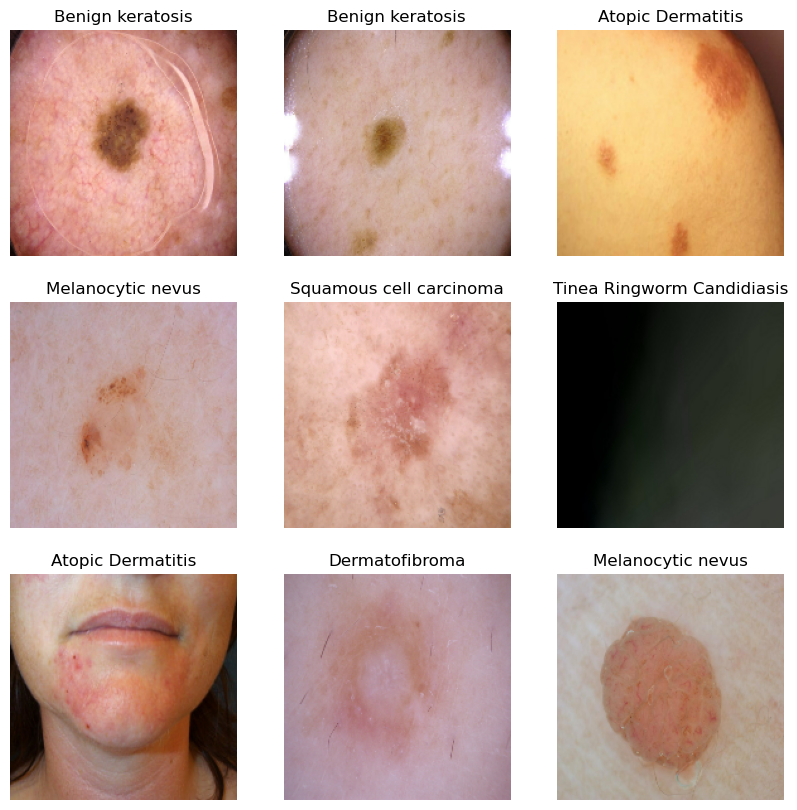

In [26]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_skin[labels[i]])
        plt.axis('off')

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), 
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=len(data_skin))  # Ensure 'data_skin' holds the number of classes
])


In [33]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)  


Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 528ms/step - accuracy: 0.1839 - loss: 2.1666 - val_accuracy: 0.3386 - val_loss: 1.7982
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step - accuracy: 0.3905 - loss: 1.6939 - val_accuracy: 0.4878 - val_loss: 1.3497
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - accuracy: 0.4916 - loss: 1.3459 - val_accuracy: 0.5753 - val_loss: 1.1526
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - accuracy: 0.5469 - loss: 1.2376 - val_accuracy: 0.5438 - val_loss: 1.0885
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 421ms/step - accuracy: 0.5863 - loss: 1.0263 - val_accuracy: 0.6313 - val_loss: 0.9362
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - accuracy: 0.6640 - loss: 0.9117 - val_accuracy: 0.6657 - val_loss: 0.7989
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 441ms/step - accuracy: 0.6925 - loss: 0.7659 - val_accuracy: 0.7374 - val_loss: 0.7053
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - accuracy: 0.7099 - loss: 0.7181 - val_accuracy

Text(0.5, 1.0, 'Loss')

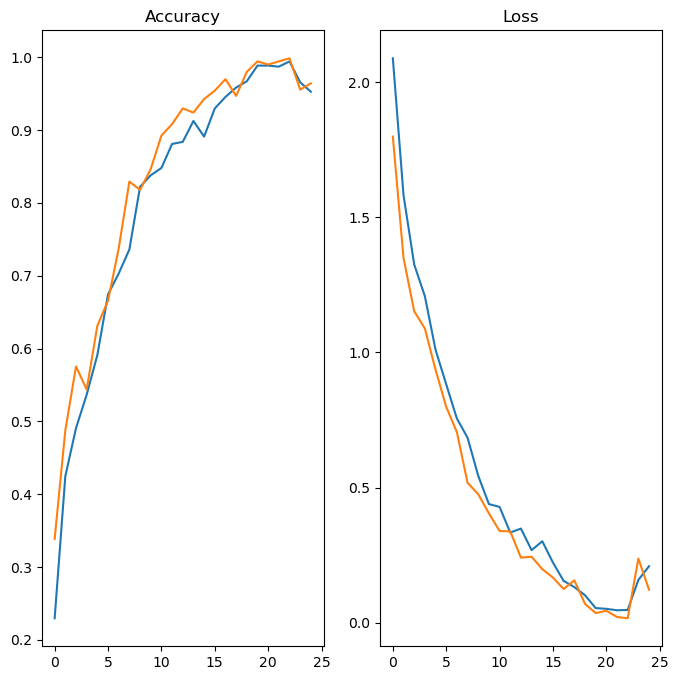

In [36]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Traning Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Traning Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [49]:
image = r'C:\Users\Sanduni\Desktop\mini project\New folder\Benign keratosis.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [50]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [51]:
score = tf.nn.softmax(predict)

In [52]:
print('Skin disease is in image {} with accuracy of {:0.2f}'.format(data_skin[np.argmax(score)],np.max(score)*100))

Skin disease is in image Dermatofibroma with accuracy of 89.66


In [53]:
model.save('Image_Classification.keras')